## linear regression problem 
the goal is to find the chance of admission of a candidate based on his /her GRE score(out of 340),
rating of the university (out of 5) in which he/she is trying to get admission, the strength of the sop (out of 5), the strength of the sop(out of 5), the strength of the letter of recommendation (out of 5), CGPA(out of 10) and the research experience (0 or 1)

In [ ]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data =pd.read_csv('/home/puru/machine learninng with deployment/Machine Learning/module1/LinearRegressionTillCloud-1/LinearRegressionTillCloud/Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
data.shape

(500, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [7]:
data.isna()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [8]:
data.isna().sum()  # finding the count of missing values from different  columns

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [9]:
data['GRE Score'].mode()

0    312.0
1    324.0
dtype: float64

In [10]:
data['GRE Score'].fillna(data['GRE Score'].mode()[0], inplace= True)

# to replace the misssing values in the "GRE Score" column with the mode of the column

# Mode has been used here to replace the scores with the most occuring scores so that data follows the general trend

In [11]:
data['TOEFL Score'].fillna(data['TOEFL Score'].mode()[0], inplace= True)

# to replace the misssing values in the "TOEFL Score" column with the mode of the column

# Mode has been used here to replace the scores with the most occuring scores so that data follows the general trend

In [12]:
data['University Rating'].fillna(data['University Rating'].mean(), inplace= True)

# to replace the misssing values in the "University Rating" column with the mode of the column

# Mean has been used here to replace the scores with the avearge  data 

In [13]:
# dropping the " chance of admit" and " serial number" as they are not going to be used as features for prediction


x= data.drop(['Chance of Admit','Serial No.'], axis=1)

# chance of admit is the target column which shows the probabilty of admission for a condidate
y= data['Chance of Admit']

In [14]:
x.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [15]:
x.head() # checkinng the transformed feature of coulumns

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


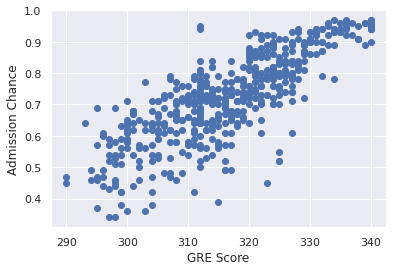

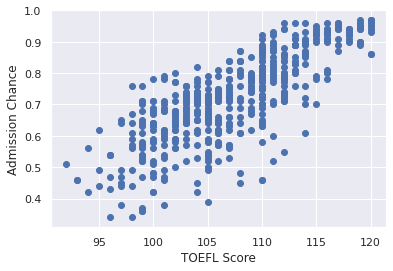

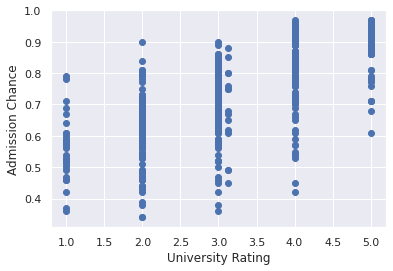

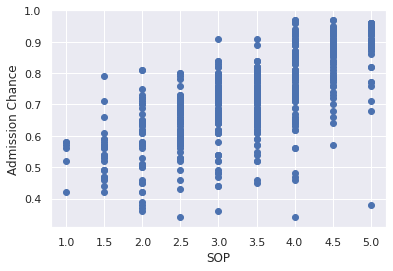

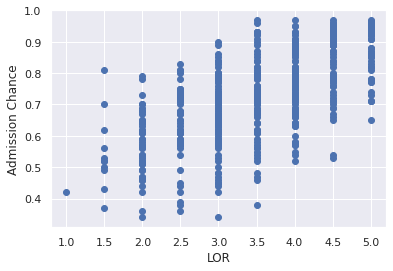

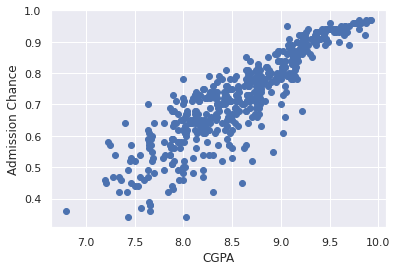

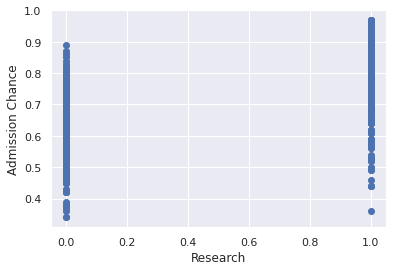

In [16]:
# showing the relation ship between all the columns and the label

for col in x.columns:
    if(col !=['Chance of Admit']):
        plt.scatter(x[col],y)
        plt.xlabel(col)
        plt.ylabel('Admission Chance')
        plt.show()

In [17]:

x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [18]:
# to be only used if you want to scale the data

# standard scale is techanique where we try to decompose our dataset into a lower scale or 
# into other scale
from sklearn.preprocessing import StandardScaler
scaler_feature= StandardScaler()
scaler_label= StandardScaler()
scaled_data= scaler_feature.fit_transform(x)
scaled_data

array([[ 1.85052822,  1.77547686,  0.77890565, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.77890565, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.1078766 , ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66568791, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.77890565, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.77890565, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [19]:
#scaled_data # looking at the dataset after scaling

In [20]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33, random_state= 100)

In [21]:
# fitting the date to the linear regresssion model
from sklearn import linear_model
reg= linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [22]:
# calculating the accuracy of the model

from sklearn.metrics import r2_score
score= r2_score(reg.predict(test_x),test_y)
score

0.8076993525686702

In [23]:
reg.predict(test_x)

array([0.85868396, 0.47100161, 0.6280096 , 0.44578053, 0.64598598,
       0.85398867, 0.58423805, 0.6708053 , 0.81576593, 0.68391898,
       0.66322789, 0.60710496, 0.89390747, 0.76122405, 0.63653857,
       0.50101692, 0.5932031 , 0.74550918, 0.56026094, 0.71477719,
       0.89825968, 0.60985982, 0.85096431, 0.82326697, 0.99808338,
       0.60354515, 0.68321824, 0.93662411, 0.87713203, 0.70043558,
       0.78420399, 0.85380635, 0.7502154 , 0.55268936, 0.73961435,
       0.78262859, 0.79567973, 0.57756558, 0.54007331, 0.70184561,
       0.94815906, 0.58454502, 0.83942492, 0.78608391, 0.8110905 ,
       0.54729563, 0.59557674, 0.87410501, 0.95154098, 0.59880994,
       0.81659257, 0.70920574, 0.80814867, 0.99084397, 0.64359316,
       0.85476613, 0.6179743 , 0.89711609, 0.76941624, 0.73447114,
       0.68813814, 0.62390397, 0.47604256, 0.8832669 , 0.64759615,
       0.68476495, 0.70437717, 0.45943371, 0.84033595, 0.84308359,
       0.92763891, 0.77439541, 0.65730255, 0.83786836, 0.64625

In [24]:
# saving the model to the local file system
import pickle
filename= 'finalized model.pickle'
pickle.dump(reg,open(filename,'wb'))

In [25]:
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler_feature.transform([[240,60,5,5,5,10,1]]))
a

array([-0.94815095])

In [26]:
scaler_test= StandardScaler()

In [27]:
scaler_test

StandardScaler()

In [35]:
# prediction usig the save model

loaded_model= pickle.load(open(filename,'rb'))
prediction=loaded_model.predict([[109,110,5,5,5,10,1]])
prediction

array([0.68195392])